<h2 align="center" > Credit Card Premiums Prediction </h2>

### Import Important Libraries

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from xgboost import XGBRegressor

<h2 align="center" > Load Datasets </h2>

In [3]:
df = pd.read_excel("premiums_young_with_gr.xlsx")
df.shape

(20096, 14)

In [4]:
df.columns = df.columns.str.replace(" ","_").str.lower()

In [5]:
### print some few rows of the data sets 
print("some few rows of datasets")
df.head(4)

some few rows of datasets


,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,2


<h2 align="center" > Data Cleaning & EDA </h2>

### Handle Missing Values

In [6]:
df.isnull().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           2
employment_status        1
income_level             4
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [7]:
df.dropna(inplace=True)
df.head(5)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,2
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,1


In [8]:
df.isnull().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

### Handling Duplicates 

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

### Baisc anlysis 

In [11]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20090.000000,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.718019,22.510851,8142.096267,2.503932
std,2.294052,0.940713,23.420493,2749.906347,1.710203
min,18.000000,-3.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.250000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,790.000000,18186.000000,5.000000


### Data cleaning Number Of Dependants

In [12]:
df[df['number_of_dependants']<0]['number_of_dependants'].unique()

array([-3, -1])

In [13]:
df['number_of_dependants'] = df['number_of_dependants'].abs()

In [14]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20090.000000,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.722598,22.510851,8142.096267,2.503932
std,2.294052,0.937200,23.420493,2749.906347,1.710203
min,18.000000,0.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.250000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,790.000000,18186.000000,5.000000


## 1. Numeric Columns

### Univariate Analysis: Numeric Columns

### Box Plot for Numeric columns 

In [15]:
Numeric_columns = df.select_dtypes(["float" , "int"]).columns
Numeric_columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount',
       'genetical_risk'],
      dtype='object')

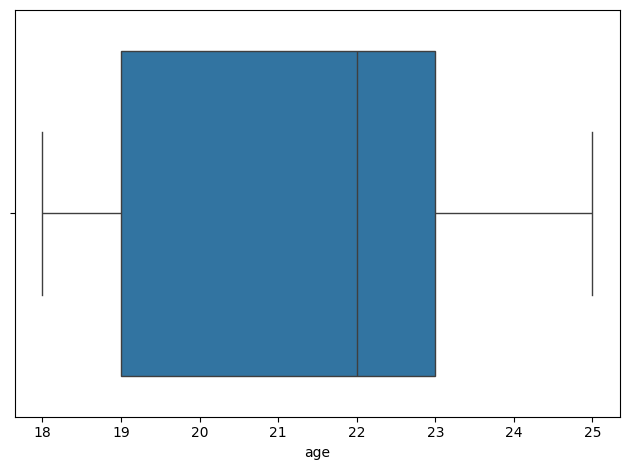

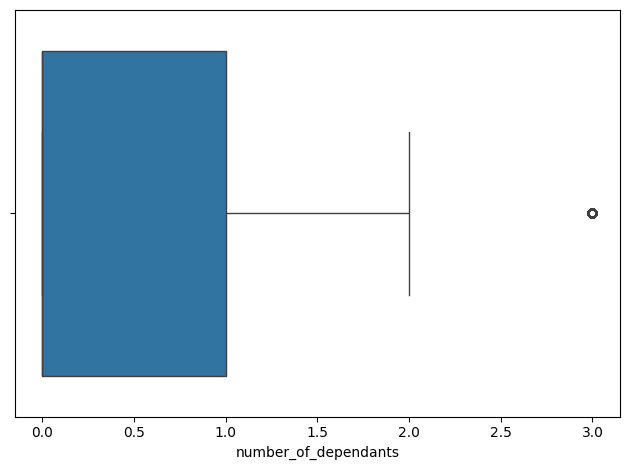

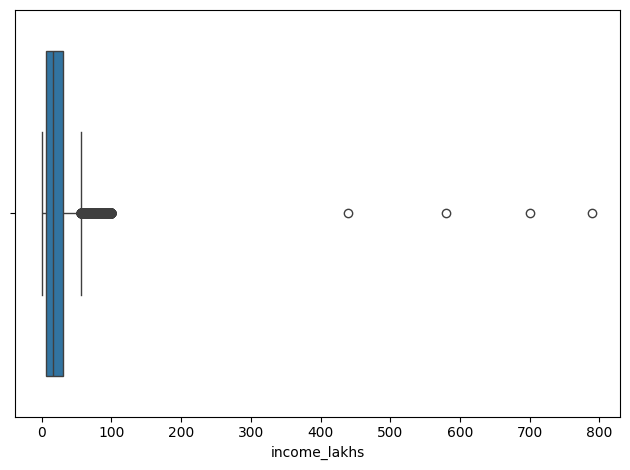

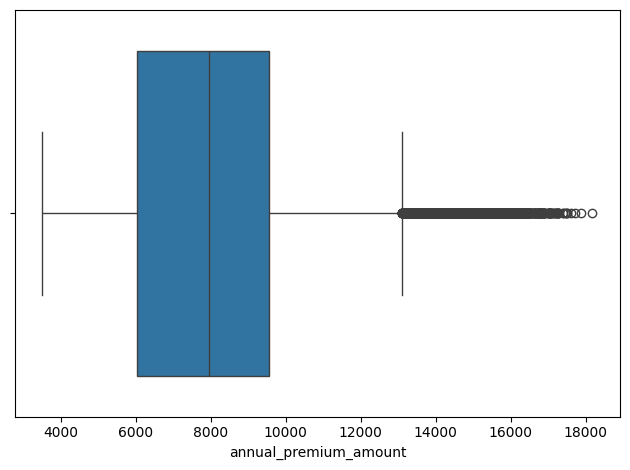

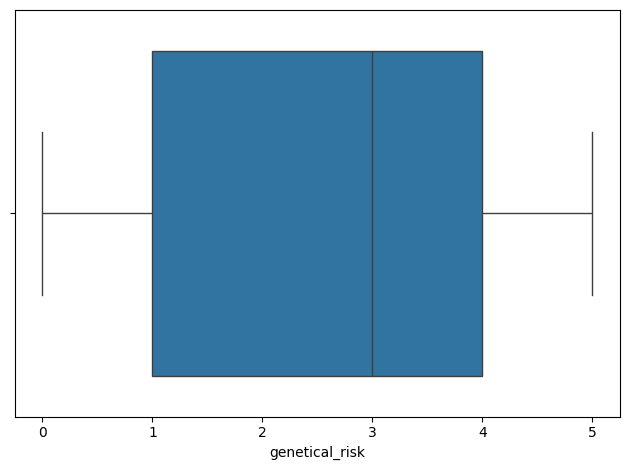

In [16]:
for col in Numeric_columns : 
    sns.boxplot(x=df[col] , whis=1.0)
    plt.tight_layout()
    plt.show()

#### Box plots for numeric columns

### Outlier Treatment: Age Column

In [17]:
df[df["age"]>100]

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk


In [18]:
df[df["age"]>100]["age"].unique()

array([], dtype=int64)

In [19]:
df[df["age"]<100]["age"].unique()

array([18, 22, 21, 25, 20, 19, 23, 24])

In [20]:
df1 = df[df.age<=100].copy()
df1.age.describe()

count    20090.000000
mean        21.494375
std          2.294052
min         18.000000
25%         19.000000
50%         22.000000
75%         23.000000
max         25.000000
Name: age, dtype: float64

### Outlier Treatment: Income Column

In [21]:
def get_low_upp(col) :
    Q1 , Q3 = col.quantile([0.25 , 0.75])
    IQR = Q3 - Q1 
    lower_bound = Q1 - 1.5*IQR
    Upper_bound = Q3 + 1.5*IQR
    return lower_bound , Upper_bound

lower , upper = get_low_upp(df1["income_lakhs"])
lower , upper 
    

(-31.5, 68.5)

In [22]:
df1[df1.income_lakhs > upper].shape

(1295, 14)

In [23]:
quantile_threshold = df1.income_lakhs.quantile(0.999)
quantile_threshold 

np.float64(100.0)

In [24]:
df1[df1.income_lakhs > quantile_threshold].shape

(4, 14)

In [25]:
df_2 = df1[df1.income_lakhs <= quantile_threshold].copy()
df_2.shape

(20086, 14)

In [26]:
df_2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000
mean,21.494474,0.722742,22.390371,8141.799263,2.503883
std,2.294248,0.937238,21.732062,2749.912486,1.710184
min,18.000000,0.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.000000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,100.000000,18186.000000,5.000000


### Distributing income using histogram 

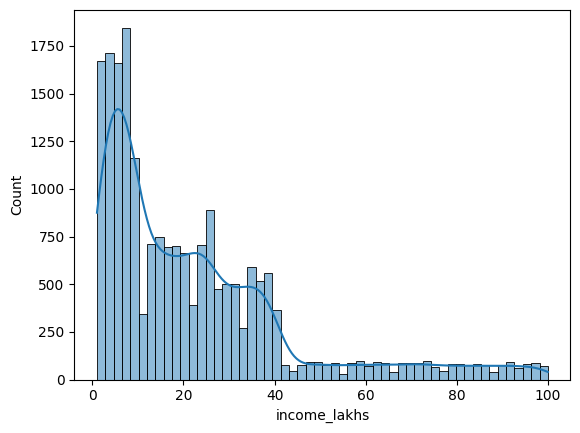

In [27]:
sns.histplot(df_2.income_lakhs , kde=True)
plt.show()

### Distributing all the numeric_columns

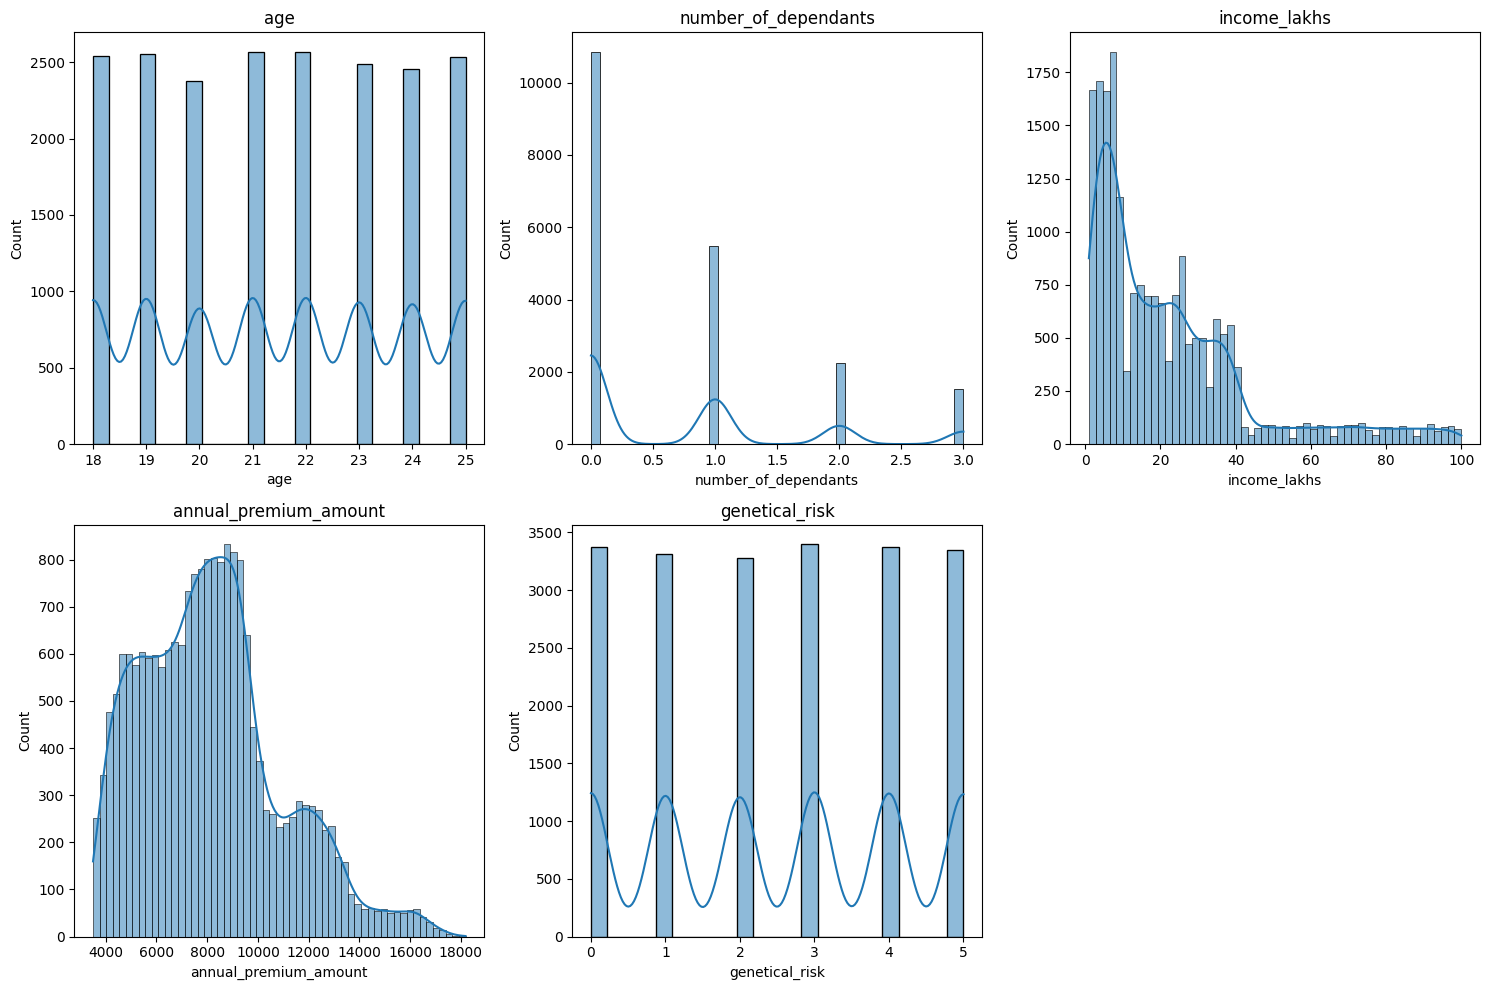

In [29]:
import math

n_cols = 3
n_rows = math.ceil(len(Numeric_columns) / n_cols)

fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))
axs = axs.flatten()  # 2D array ko 1D bana diya

for i, column in enumerate(Numeric_columns):
    sns.histplot(df_2[column], kde=True, ax=axs[i])
    axs[i].set_title(column)

# extra empty subplots hataane ke liye
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


### scatter plot compare two colums 

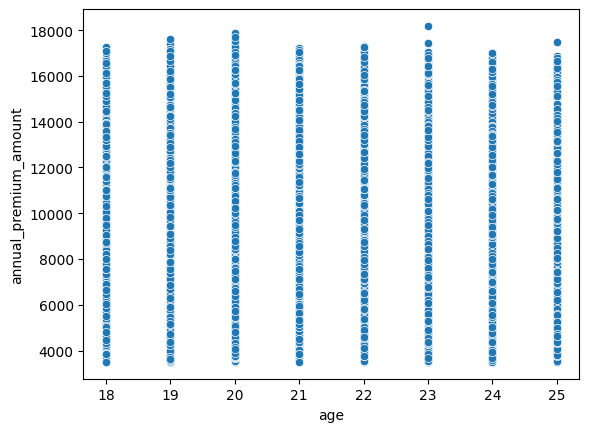

In [30]:
sns.scatterplot(df_2 , x="age" , y="annual_premium_amount")
plt.show()

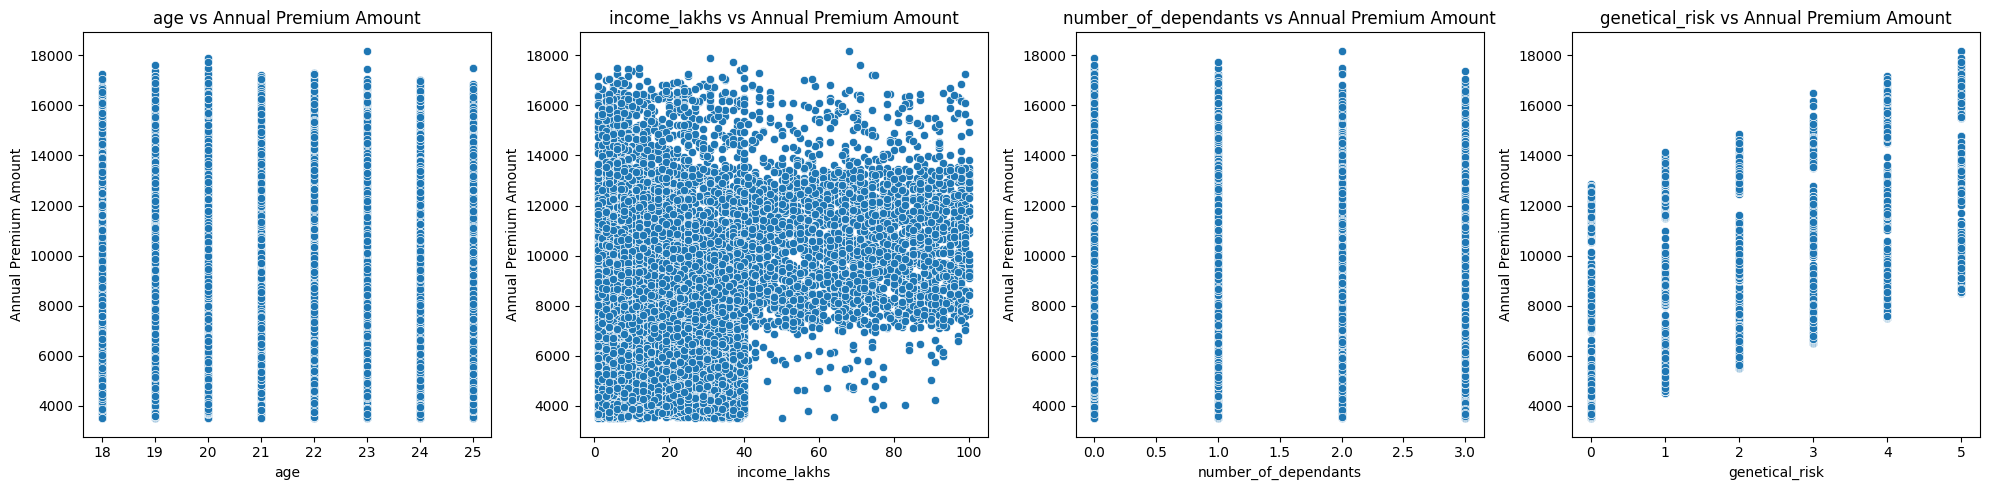

In [33]:
numeric_features = ['age', 'income_lakhs', 'number_of_dependants', 'genetical_risk']

fig, axes = plt.subplots(1, len(numeric_features), figsize=(20, 5))

for ax, column in zip(axes, numeric_features):
    sns.scatterplot(x=df_2[column], y=df_2['annual_premium_amount'], ax=ax)
    ax.set_title(f'{column} vs Annual Premium Amount')
    ax.set_xlabel(column)
    ax.set_ylabel('Annual Premium Amount')

plt.tight_layout()
plt.show()


## 2. Categorical Columns

In [34]:
categorical_columns = df_2.select_dtypes(include=["object"]).columns
categorical_columns

Index(['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status', 'income_level', 'medical_history',
       'insurance_plan'],
      dtype='object')

In [35]:
for col in categorical_columns : 
    print(col , ":" , df_2[col].unique())

gender : ['Male' 'Female']
region : ['Northeast' 'Northwest' 'Southeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Overweight' 'Underweight' 'Normal' 'Obesity']
smoking_status : ['Regular' 'No Smoking' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
employment_status : ['Self-Employed' 'Freelancer' 'Salaried']
income_level : ['> 40L' '<10L' '10L - 25L' '25L - 40L']
medical_history : ['High blood pressure' 'No Disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease' 'Diabetes' 'Diabetes & Thyroid'
 'Heart disease' 'Thyroid' 'High blood pressure & Heart disease']
insurance_plan : ['Silver' 'Bronze' 'Gold']


In [36]:
df_2['smoking_status'].replace({
    'Not Smoking': 'No Smoking',
    'Does Not Smoke': 'No Smoking',
    'Smoking=0': 'No Smoking'
}, inplace=True)

df_2['smoking_status'].unique()


array(['Regular', 'No Smoking', 'Occasional'], dtype=object)

### Univariate Analysis

In [37]:
df_2["gender"].value_counts()

gender
Male      11055
Female     9031
Name: count, dtype: int64

In [38]:
count = df_2["gender"].value_counts(normalize=True)*100
count

gender
Male      55.038335
Female    44.961665
Name: proportion, dtype: float64

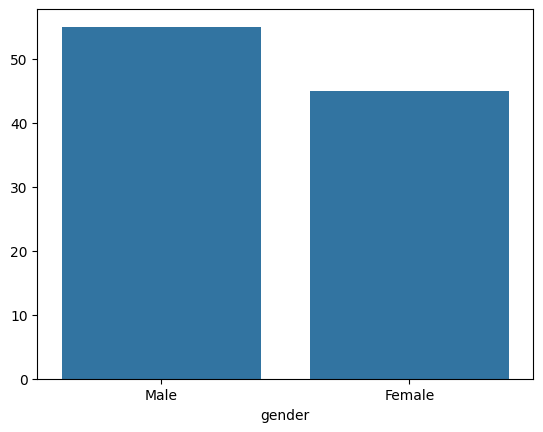

In [39]:
sns.barplot(x=count.index , y=count.values)
plt.show()

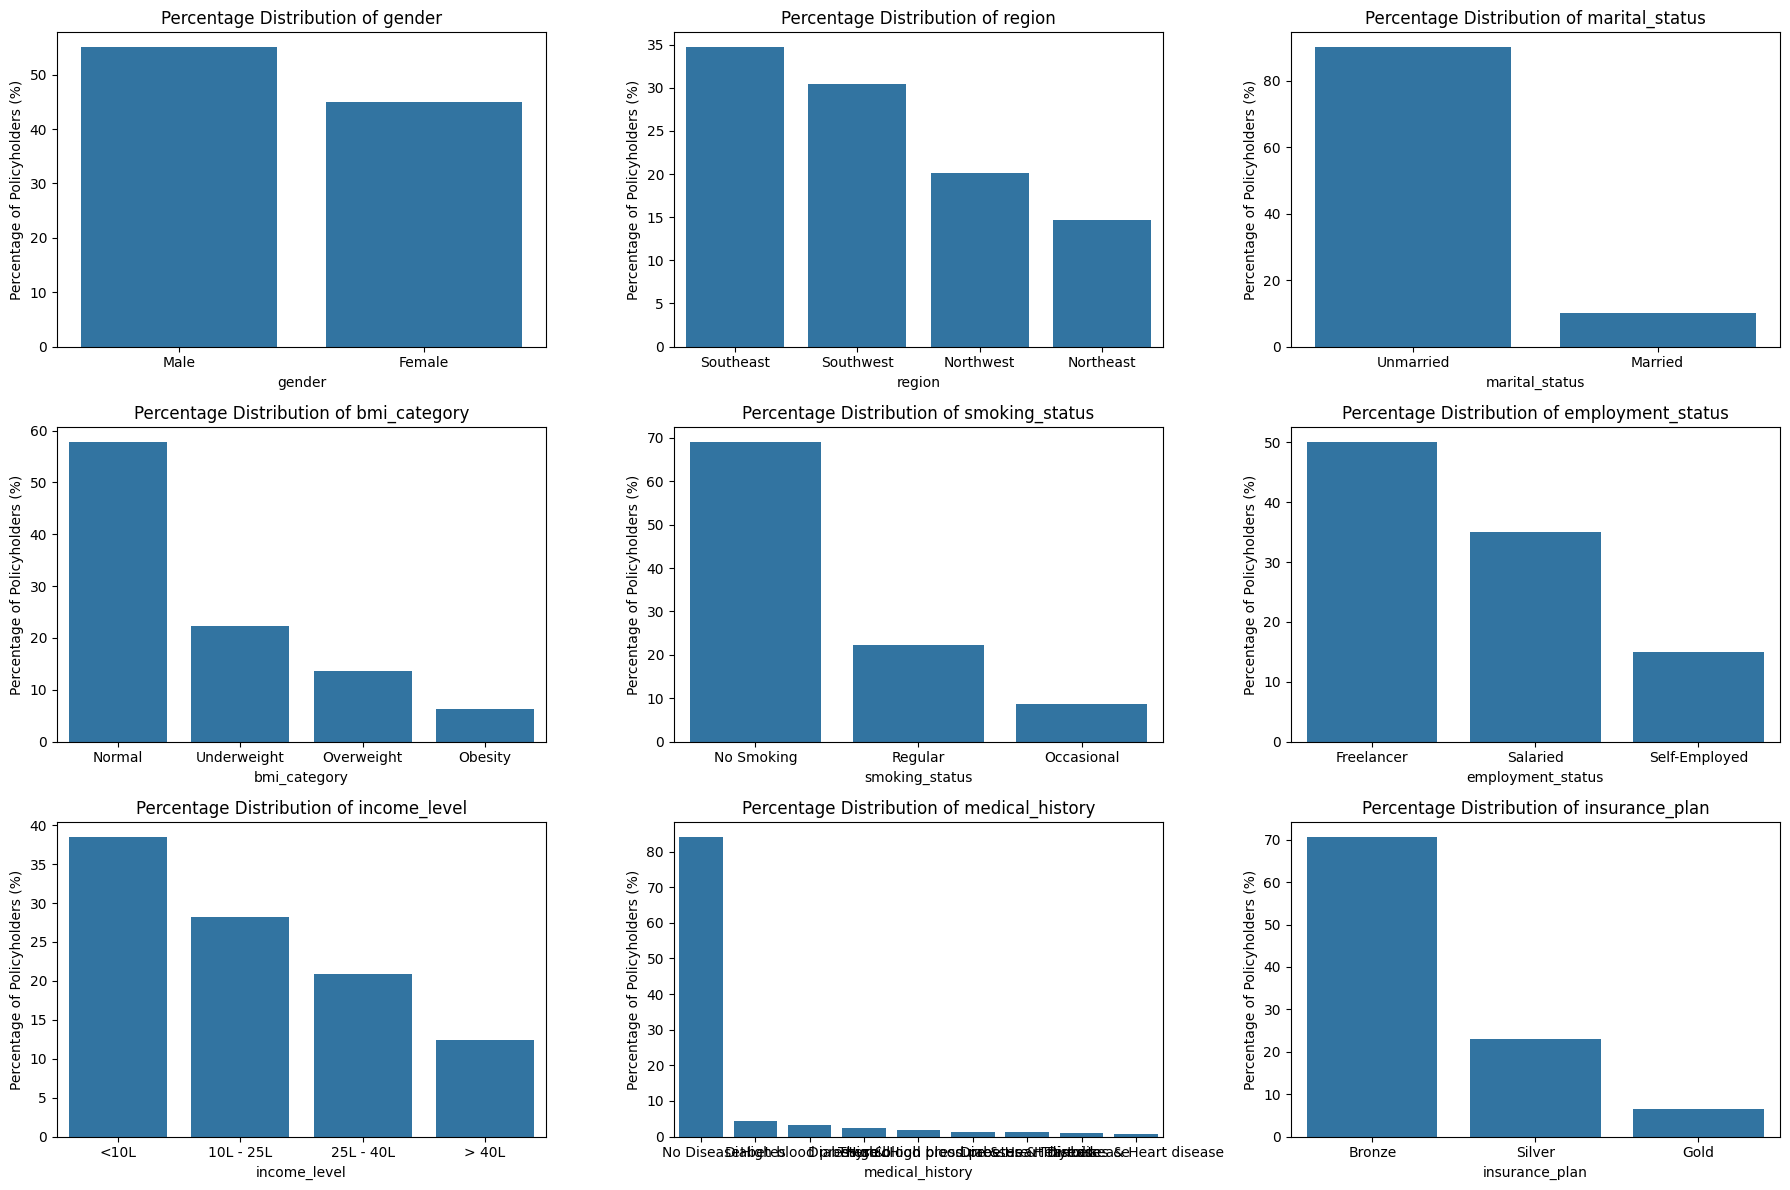

In [40]:
fig, axes = plt.subplots(3,3, figsize=(18, 12))  # Adjust figure size as necessary
axes = axes.flatten()
for ax, column in zip(axes, categorical_columns):
    category_count = df_2[column].value_counts(normalize=True)*100
    sns.barplot(x=category_count.index, y=category_count.values, ax=ax)
    ax.set_title(f'{column} vs. annual_premium_amount')
    ax.set_title(f'Percentage Distribution of {column}')
    ax.set_ylabel('Percentage of Policyholders (%)')

plt.tight_layout()  # Adjust layout
plt.show()

In [41]:
crosstab = pd.crosstab(df_2["income_level"] , df["insurance_plan"])
crosstab

insurance_plan,Bronze,Gold,Silver
income_level,,,
10L - 25L,4508,326,828
25L - 40L,3382,209,608
<10L,6172,404,1145
> 40L,115,366,2023


insurance_plan  Bronze  Gold  Silver
income_level                        
10L - 25L         4508   326     828
25L - 40L         3382   209     608
<10L              6172   404    1145
> 40L              115   366    2023


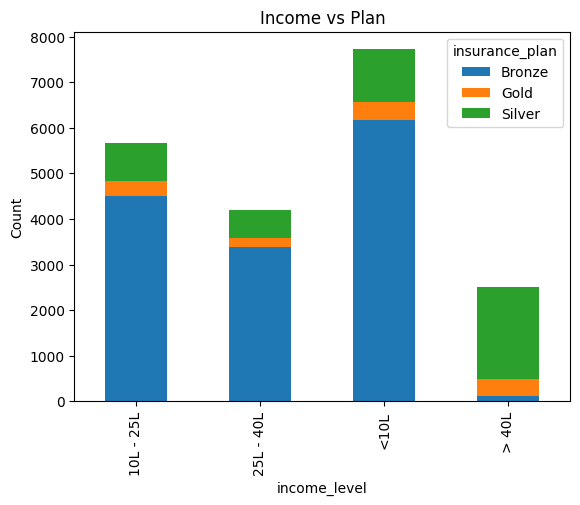

In [42]:
print(crosstab)
crosstab.plot(kind="bar" , stacked=True)
plt.title('Income vs Plan')
plt.ylabel('Count')
plt.show()

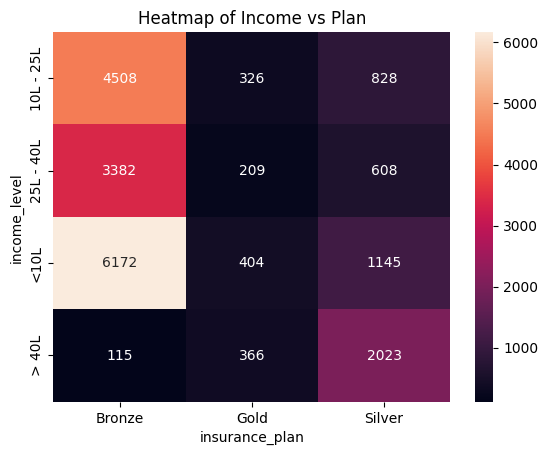

In [43]:
sns.heatmap(crosstab , annot=True , fmt="d")
plt.title('Heatmap of Income vs Plan')
plt.show()

<h2 align="center"> Feature Engineering</h2>

In [44]:
df_2.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3


In [45]:
df_2["medical_history"].unique()

array(['High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Diabetes & Heart disease',
       'Diabetes', 'Diabetes & Thyroid', 'Heart disease', 'Thyroid',
       'High blood pressure & Heart disease'], dtype=object)

In [46]:
risk_scores = {
    "diabetes": 6,
    "heart disease": 8,
    "high blood pressure":6,
    "thyroid": 5,
    "no disease": 0,
    "none":0
}

df_2[['disease1', 'disease2']] = df_2['medical_history'].str.split(" & ", expand=True).apply(lambda x: x.str.lower())
df_2['disease1'].fillna('none', inplace=True)
df_2['disease2'].fillna('none', inplace=True)
df_2['total_risk_score'] = 0

for disease in ['disease1', 'disease2']:
    df_2['total_risk_score'] += df_2[disease].map(risk_scores)

# Normalize the risk score to a range of 0 to 1
max_score = df_2['total_risk_score'].max()
min_score = df_2['total_risk_score'].min()
df_2['normalized_risk_score'] = (df_2['total_risk_score'] - min_score) / (max_score - min_score)
df_2.head(2)



,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4,high blood pressure,none,6,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3,no disease,none,0,0.000000


In [47]:
df_2.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
disease1                 0
disease2                 0
total_risk_score         0
normalized_risk_score    0
dtype: int64

### Encoded Text column 

In [49]:
df_2['insurance_plan'] = df_2['insurance_plan'].map({'Bronze': 1, 'Silver': 2, 'Gold': 3})

In [48]:
df_2.income_level.unique()

array(['> 40L', '<10L', '10L - 25L', '25L - 40L'], dtype=object)

In [50]:
df_2["income_level"] = df_2["income_level"].map({'<10L':1, '10L - 25L': 2, '25L - 40L':3, '> 40L':4})
df_2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,4,99,High blood pressure,2,13365,4,high blood pressure,none,6,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,1,3,No Disease,2,11050,3,no disease,none,0,0.000000
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,4,97,No Disease,2,11857,4,no disease,none,0,0.000000
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,2,15,No Disease,1,5684,2,no disease,none,0,0.000000
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,2,14,No Disease,1,5712,1,no disease,none,0,0.000000


### One Hot Encoding

In [51]:
nominal_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status']
df_3 = pd.get_dummies(df_2 , columns=nominal_cols , drop_first = True , dtype=int)
df_3.sample(5)

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
18666,24,0,2,18,No Disease,1,7735,4,no disease,none,...,0,0,1,0,0,1,0,0,1,0
18331,18,1,2,15,High blood pressure,1,8904,4,high blood pressure,none,...,0,1,1,0,0,1,0,1,1,0
17010,25,0,1,6,No Disease,1,5852,2,no disease,none,...,0,0,1,0,0,0,0,0,0,0
9966,20,0,2,10,No Disease,2,9796,2,no disease,none,...,0,0,1,0,0,1,0,0,1,0
14202,23,0,2,12,No Disease,1,9023,5,no disease,none,...,1,0,1,0,0,1,0,0,1,0


In [52]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20086 entries, 0 to 20095
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              20086 non-null  int64  
 1   number_of_dependants             20086 non-null  int64  
 2   income_level                     20086 non-null  int64  
 3   income_lakhs                     20086 non-null  int64  
 4   medical_history                  20086 non-null  object 
 5   insurance_plan                   20086 non-null  int64  
 6   annual_premium_amount            20086 non-null  int64  
 7   genetical_risk                   20086 non-null  int64  
 8   disease1                         20086 non-null  object 
 9   disease2                         20086 non-null  object 
 10  total_risk_score                 20086 non-null  int64  
 11  normalized_risk_score            20086 non-null  float64
 12  gender_Male            

### Feature Selection

In [53]:
df_4 = df_3.drop(['medical_history','disease1', 'disease2', 'total_risk_score'], axis=1)
df_4.tail(4)

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
20092,23,0,4,57,3,14498,2,0.428571,0,1,0,0,1,1,0,0,1,0,0,0
20093,24,0,3,35,1,9111,5,0.000000,0,1,0,0,1,0,0,1,0,0,0,1
20094,21,0,3,32,1,8564,4,0.000000,1,1,0,0,1,0,0,0,0,1,0,0
20095,18,2,2,20,1,9490,5,0.000000,1,1,0,0,1,0,0,0,0,0,1,0


### Calculate VIF for Multicolinearity

In [54]:
df_4.columns

Index(['age', 'number_of_dependants', 'income_level', 'income_lakhs',
       'insurance_plan', 'annual_premium_amount', 'genetical_risk',
       'normalized_risk_score', 'gender_Male', 'region_Northwest',
       'region_Southeast', 'region_Southwest', 'marital_status_Unmarried',
       'bmi_category_Obesity', 'bmi_category_Overweight',
       'bmi_category_Underweight', 'smoking_status_Occasional',
       'smoking_status_Regular', 'employment_status_Salaried',
       'employment_status_Self-Employed'],
      dtype='object')

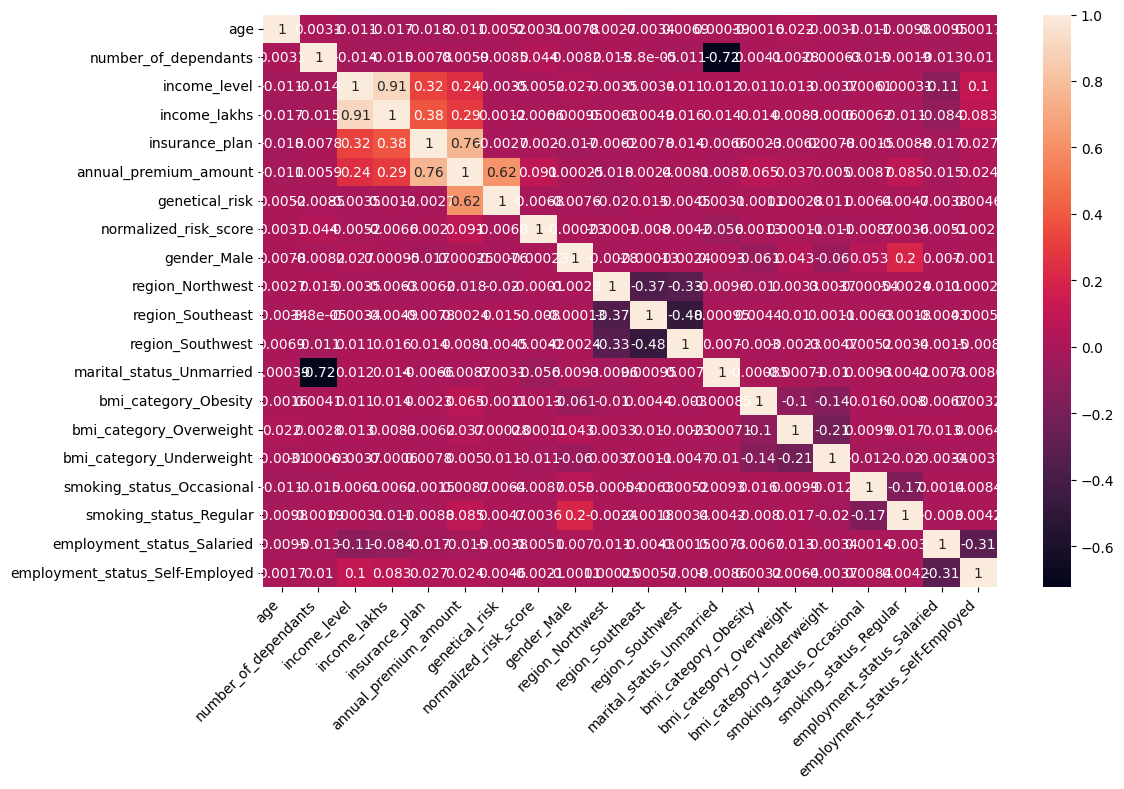

In [55]:
cm = df_4.corr()

plt.figure(figsize=(12 , 8))
sns.heatmap(cm , annot=True ,)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [57]:
df_4.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,4,99,2,13365,4,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,22,0,1,3,2,11050,3,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,21,0,4,97,2,11857,4,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,25,0,2,15,1,5684,2,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,20,2,2,14,1,5712,1,0.000000,1,0,1,0,1,0,1,0,0,0,0,0


In [58]:
X = df_4.drop("annual_premium_amount" , axis="columns")
y = df_4["annual_premium_amount"]

from sklearn.preprocessing import MinMaxScaler
columns_to_scale = ['age','number_of_dependants', 'income_level',  'income_lakhs', 'insurance_plan']
scaler = MinMaxScaler()

X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])
X.describe()



,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000
mean,0.499211,0.240914,0.357994,0.216064,0.179578,2.503883,0.092076,0.550383,0.201284,0.346958,0.304590,0.899881,0.063527,0.136513,0.222493,0.086379,0.223589,0.350045,0.149955
std,0.327750,0.312413,0.347481,0.219516,0.300051,1.710184,0.230016,0.497467,0.400970,0.476014,0.460245,0.300167,0.243914,0.343341,0.415931,0.280929,0.416660,0.476996,0.357036
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142857,0.000000,0.000000,0.050505,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.571429,0.000000,0.333333,0.151515,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.714286,0.333333,0.666667,0.303030,0.500000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
X.isna().sum()

age                                0
number_of_dependants               0
income_level                       0
income_lakhs                       0
insurance_plan                     0
genetical_risk                     0
normalized_risk_score              0
gender_Male                        0
region_Northwest                   0
region_Southeast                   0
region_Southwest                   0
marital_status_Unmarried           0
bmi_category_Obesity               0
bmi_category_Overweight            0
bmi_category_Underweight           0
smoking_status_Occasional          0
smoking_status_Regular             0
employment_status_Salaried         0
employment_status_Self-Employed    0
dtype: int64

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculateVif(data) : 
    vif_df = pd.DataFrame()
    vif_df["columns"] = data.columns
    vif_df["vif"] = [variance_inflation_factor(data.values , i ) for i in range(data.shape[1])]
    return vif_df

In [61]:
calculateVif(X)

,columns,vif
0,age,3.154599
1,number_of_dependants,1.930428
2,income_level,11.928708
3,income_lakhs,11.876413
4,insurance_plan,1.592966
5,genetical_risk,2.981159
6,normalized_risk_score,1.154501
7,gender_Male,2.311831
8,region_Northwest,2.154355
9,region_Southeast,2.990493


In [62]:
calculateVif(X.drop("income_level" , axis ="columns"))

,columns,vif
0,age,3.153255
1,number_of_dependants,1.927788
2,income_lakhs,2.294155
3,insurance_plan,1.587868
4,genetical_risk,2.981158
5,normalized_risk_score,1.154453
6,gender_Male,2.301658
7,region_Northwest,2.153423
8,region_Southeast,2.989301
9,region_Southwest,2.743932


In [63]:
# we will drop income_lakhs due to high VIF value
X_reduced = X.drop('income_level', axis="columns")

<h2 align="center">Model Trainig</h2>

### Train Test split

In [64]:
x_train , x_test , y_train ,y_test = train_test_split(X_reduced , y , test_size = 0.3 , random_state=42)

# shape of the X_train, X_test, y_train, y_test features
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (14060, 18)
x test:  (6026, 18)
y train:  (14060,)
y test:  (6026,)


### Linear regression model 

In [65]:
model_lr = LinearRegression()
model_lr.fit(x_train , y_train)
test_score = model_lr.score(x_test, y_test)
train_score = model_lr.score(x_train, y_train)
train_score, test_score

(0.9884990017445308, 0.9882609305654483)

In [66]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
y_pred = model_lr.predict(x_test)

mse =   mean_squared_error(y_test , y_pred)
r2_score = r2_score(y_test , y_pred)
msa = mean_absolute_error(y_test , y_pred) 

print(f"mse : {mse} , r2_score : {r2_score} , msa : {msa}")

mse : 89439.7314526088 , r2_score : 0.9882609305654483 , msa : 257.51682231787237


In [67]:
x_test.head(1)

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
10489,0.428571,1.0,0.080808,0.0,1,0.428571,1,0,0,0,0,0,0,0,0,0,0,0


In [68]:
model_lr.intercept_

np.float64(3973.485873613309)

In [69]:
model_lr.coef_

array([-1.05801891e-01,  2.01069306e+01, -1.18192939e+01,  6.99564576e+03,
        9.96735067e+02,  1.13118985e+03,  6.08209851e+00,  1.91642829e+00,
        2.07974087e+00,  8.29849020e+00,  1.42155309e+01,  8.01977884e+02,
        4.04437286e+02,  1.13743592e+02,  2.07656492e+02,  6.07368444e+02,
        7.08985789e+00,  9.30425482e+00])

In [70]:
Features_importants = model_lr.coef_
# Create a DataFrame for easier handling
coef_df = pd.DataFrame(Features_importants , index = x_test.columns , columns=["coefficient"])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values( by="coefficient" , ascending=True)
coef_df

,coefficient
income_lakhs,-11.819294
age,-0.105802
region_Northwest,1.916428
region_Southeast,2.079741
gender_Male,6.082099
employment_status_Salaried,7.089858
region_Southwest,8.298490
employment_status_Self-Employed,9.304255
marital_status_Unmarried,14.215531
number_of_dependants,20.106931


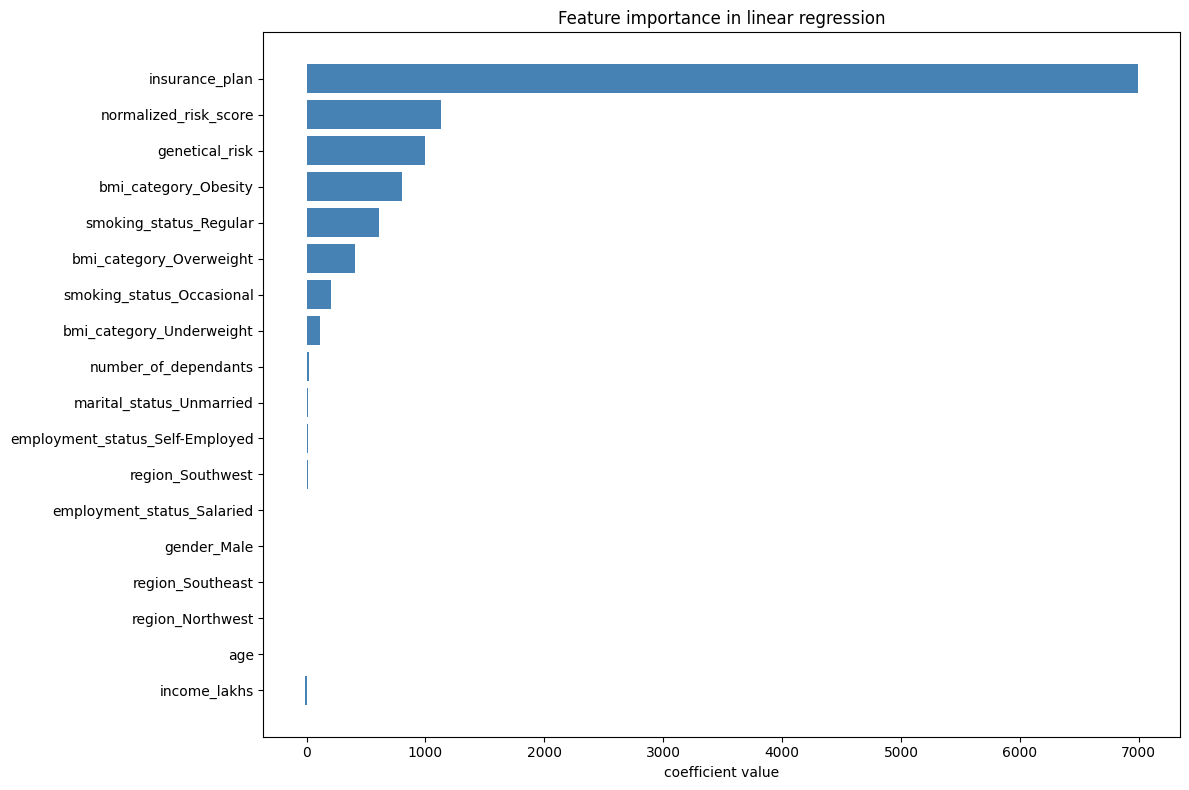

In [71]:
# Plotting
plt.figure(figsize=(12 ,8))
plt.barh(coef_df.index, coef_df['coefficient'], color='steelblue')
plt.xlabel("coefficient value")
plt.title("Feature importance in linear regression")
plt.tight_layout()

### Ridge Approch 

In [72]:
model_ra =  Ridge(alpha=10)
model_ra.fit(x_train , y_train)
test_score = model_ra.score(x_test, y_test)
train_score = model_ra.score(x_train, y_train)
train_score, test_score

(0.9884538731039115, 0.9882073824001385)

In [73]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
y_pred = model_ra.predict(x_test)

mse =   mean_squared_error(y_test , y_pred)
r2_score = r2_score(y_test , y_pred)
msa = mean_absolute_error(y_test , y_pred) 

print(f"mse : {mse} , r2_score : {r2_score} , msa : {msa}")

mse : 89847.71383586209 , r2_score : 0.9882073824001385 , msa : 257.83011622722177


### XGBOOST Regressor

In [74]:
model_xg = XGBRegressor()
model_xg.fit(x_train , y_train)
test_score = model_xg.score(x_test, y_test)
train_score = model_xg.score(x_train, y_train)
train_score, test_score

(0.9926241040229797, 0.9874040484428406)

In [75]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
y_pred = model_xg.predict(x_test)

mse =   mean_squared_error(y_test , y_pred)
r2_score = r2_score(y_test , y_pred)
msa = mean_absolute_error(y_test , y_pred) 

print(f"mse : {mse} , r2_score : {r2_score} , msa : {msa}")

mse : 95968.5 , r2_score : 0.9874040484428406 , msa : 264.703857421875


### Error Analysis

In [77]:
best_model = model_lr

In [78]:
y_pred = best_model.predict(x_test) 

residuals =  y_pred - y_test
residuals_pct = (residuals / y_test ) * 100
result_df = pd.DataFrame({
    'actual': y_test, 
    'predicted': y_pred, 
    'diff': residuals, 
    'diff_pct': residuals_pct
})
result_df.head()

,actual,predicted,diff,diff_pct
10489,5452,5480.205181,28.205181,0.517336
7989,9658,9119.778377,-538.221623,-5.572806
3113,6031,5743.417104,-287.582896,-4.768411
10605,12386,12363.725254,-22.274746,-0.179838
4204,4245,4708.266672,463.266672,10.913231


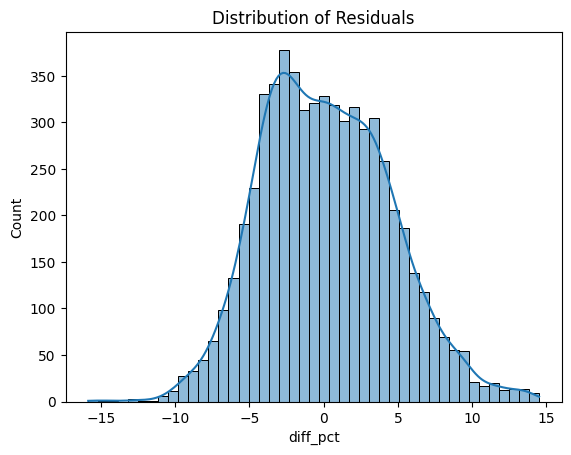

In [79]:
sns.histplot(result_df["diff_pct"] , kde=True)
plt.title("Distribution of Residuals")
plt.show()

In [80]:
result_df.shape

(6026, 4)

In [81]:
extreme_error_threshold = 10  # You can adjust this threshold based on your domain knowledge or requirements
extreme_results_df = result_df[np.abs(result_df['diff_pct']) > extreme_error_threshold]
extreme_results_df.head()

,actual,predicted,diff,diff_pct
4204,4245,4708.266672,463.266672,10.913231
13142,4215,4693.834818,478.834818,11.360257
7802,4096,4519.165150,423.165150,10.331180
9881,3952,4404.757527,452.757527,11.456415
18329,4615,5106.885700,491.885700,10.658412


In [82]:
extreme_results_df.shape

(123, 4)

In [83]:
exterme_error_pct = extreme_results_df.shape[0]*100/x_test.shape[0]
exterme_error_pct

2.0411549950215733

In [84]:
extreme_results_df[abs(extreme_results_df.diff_pct) > 50].sort_values("diff_pct" ,ascending=False)

,actual,predicted,diff,diff_pct


In [85]:
extreme_error_df = x_test.loc[extreme_results_df.index]
extreme_error_df.head()

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
4204,0.000000,0.000000,0.222222,0.0,0,0.000000,0,0,1,0,1,0,0,1,0,1,0,0
13142,0.571429,0.666667,0.070707,0.0,0,0.428571,0,0,0,1,0,0,0,0,1,0,1,0
7802,0.857143,1.000000,0.020202,0.0,0,0.357143,1,0,1,0,0,0,0,1,0,0,0,0
9881,0.714286,0.000000,0.040404,0.0,0,0.000000,1,0,0,0,1,0,1,0,0,0,1,0
18329,1.000000,0.000000,0.030303,0.0,1,0.000000,0,0,1,0,1,0,0,1,0,0,1,0


### Export Model 

In [86]:
!pip install joblib

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [90]:
from joblib import dump

dump(best_model ,"Artifacts/model_young.joblib")

scaler_with_cols = {
    "scaler" : scaler , 
    "columns_to_scale" : columns_to_scale 
}
dump(scaler_with_cols ,"Artifacts/scaler_young.joblib")

['Artifacts/scaler_young.joblib']